# 1. Import MoCo module and CIFAR dataset

## 1.1 Import MoCo module

In [1]:
!git clone https://github.com/facebookresearch/moco.git

Cloning into 'moco'...
remote: Enumerating objects: 33, done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (33/33), done.


In [0]:
from moco import *

## 1.2 Import MoCo pretrained model

In [0]:
import torch

In [45]:
!wget https://dl.fbaipublicfiles.com/moco/moco_checkpoints/moco_v1_200ep/moco_v1_200ep_pretrain.pth.tar

--2020-04-30 16:57:16--  https://dl.fbaipublicfiles.com/moco/moco_checkpoints/moco_v1_200ep/moco_v1_200ep_pretrain.pth.tar
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95347404 (91M) [application/octet-stream]
Saving to: ‘moco_v1_200ep_pretrain.pth.tar’

moco_v1_200ep_pretr 100%[===================>]  90.93M  28.8MB/s    in 3.2s    

2020-04-30 16:57:20 (28.8 MB/s) - ‘moco_v1_200ep_pretrain.pth.tar’ saved [95347404/95347404]



## 1.3 Import CIFAR data

### 1.3.1 Download CIFAR image repo

In [0]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2020-04-28 21:30:45--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  78.7MB/s    in 2.1s    

2020-04-28 21:30:48 (78.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [0]:
!tar -xzf cifar-10-python.tar.gz

In [0]:
import pickle

In [0]:
def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
cifar10_dir = '/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [0]:
import torchvision.datasets as datasets

### 1.3.2 Download CIFAR png data

In [5]:
cd /content/moco/

/content/moco


In [6]:
!wget http://pjreddie.com/media/files/cifar.tgz

--2020-04-29 18:57:32--  http://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/cifar.tgz [following]
--2020-04-29 18:57:33--  https://pjreddie.com/media/files/cifar.tgz
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz’

cifar.tgz             0%[                    ] 199.70K   191KB/s               ^C


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from shutil import copyfile

In [5]:
copyfile('/content/drive/My Drive/DL/cifar.tgz', 'cifar.tgz')

'cifar.tgz'

In [0]:
!mv '/content/sample_data/cifar.tgz' '/content/moco/cifar.tgz'

In [6]:
cd '/content/moco/'

/content/moco


In [0]:
!tar xzf cifar.tgz

In [0]:
import os

In [0]:
entries = os.listdir('./cifar/unsortedTraining/')

In [0]:
for filename in entries:
    if filename[len(filename) - 7:] == "dog.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/dog/" + filename)
    elif filename[len(filename) - 7:] == "cat.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/cat/" + filename)
    elif filename[len(filename) - 8:] == "deer.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/deer/" + filename)
    elif filename[len(filename) - 8:] == "frog.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/frog/" + filename)
    elif filename[len(filename) - 8:] == "bird.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/bird/" + filename)
    elif filename[len(filename) - 8:] == "ship.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/ship/" + filename)
    elif filename[len(filename) - 9:] == "horse.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/horse/" + filename)
    elif filename[len(filename) - 9:] == "truck.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/truck/" + filename)
    elif filename[len(filename) - 12:] == "airplane.png":
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/airplane/" + filename)
    else:
    os.rename("./cifar/unsortedTraining/" + filename, "./cifar/train/automobile/" + filename)

In [0]:
entries =  os.listdir('./cifar/test/')
for filename in entries:
    if filename[len(filename) - 7:] == "dog.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/dog/" + filename)
    elif filename[len(filename) - 7:] == "cat.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/cat/" + filename)
    elif filename[len(filename) - 8:] == "deer.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/deer/" + filename)
    elif filename[len(filename) - 8:] == "frog.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/frog/" + filename)
    elif filename[len(filename) - 8:] == "bird.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/bird/" + filename)
    elif filename[len(filename) - 8:] == "ship.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/ship/" + filename)
    elif filename[len(filename) - 9:] == "horse.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/horse/" + filename)
    elif filename[len(filename) - 9:] == "truck.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/truck/" + filename)
    elif filename[len(filename) - 12:] == "airplane.png":
        os.rename("./cifar/test/" + filename, "./cifar/val/airplane/" + filename)
    else:
        os.rename("./cifar/test/" + filename, "./cifar/val/automobile/" + filename)

In [113]:
cd /content/moco/

/content/moco


# 2. Evaluate the performance of pretrained ResNet50 model with MoCo

## 2.1 Learning rate = 30, Epochs = 10, Batch size = 64

In [50]:
!python main_lincls.py \
    -a resnet50 \
    --lr 30 \
    --epochs 10 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \
    'cifar/'

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][  0/782]	Time 47.706 (47.706)	Data 43.950 (43.950)	Loss 6.9064e+00 (6.9064e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 10/782]	Time  0.391 ( 4.694)	Data  0.000 ( 3.996)	Loss 2.9887e+01 (1.4803e+01)	Acc@1  15.62 ( 10.51)	Acc@5  53.12 ( 47.59)
Epoch: [0][ 20/782]	Time  0.395 ( 2.646)	Data  0.000 ( 2.093)	Loss 3.1700e+01 (2.2708e+01)	Acc@1  18.75 ( 13.32)	Acc@5  48.44 ( 49.33)
Epoch: [0][ 30/782]	Time  0.395 ( 1.919)	Data  0.000 ( 1.418)	Loss 2.1535e+01 (2.2174e+01)	Acc@1  29.69 ( 16.68)	Acc@5  64.06 ( 54.23)
Epoch: [0][ 40/782]	Time  0.396 ( 1.547)	Data  0.000 ( 1.072)	Loss 1.0174e+01 (1.9850e+01)	Acc@1  35.94 ( 1

## 2.2 Learning rate = 30, Epochs = 4, Batch size = 64

In [115]:
!python main_lincls.py \
    -a resnet50 \
    --lr 30 \
    --epochs 4 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \
    'cifar/' | tee moco_30_lr4.log

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][  0/782]	Time 45.336 (45.336)	Data 40.803 (40.803)	Loss 6.9082e+00 (6.9082e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 10/782]	Time  0.391 ( 4.480)	Data  0.000 ( 3.710)	Loss 2.8067e+01 (1.4050e+01)	Acc@1   4.69 ( 11.22)	Acc@5  40.62 ( 44.46)
Epoch: [0][ 20/782]	Time  0.391 ( 2.532)	Data  0.000 ( 1.943)	Loss 2.2609e+01 (1.7603e+01)	Acc@1  23.44 ( 13.76)	Acc@5  56.25 ( 48.14)
Epoch: [0][ 30/782]	Time  0.387 ( 1.841)	Data  0.000 ( 1.316)	Loss 1.6126e+01 (1.7410e+01)	Acc@1  23.44 ( 17.29)	Acc@5  65.62 ( 54.33)
Epoch: [0][ 40/782]	Time  0.395 ( 1.487)	Data  0.000 ( 0.995)	Loss 7.3231e+00 (1.6162e+01)	Acc@1  37.50 ( 2

## 2.3 Learning rate = 10, Epochs = 4, Batch size = 64

In [119]:
!python main_lincls.py \
    -a resnet50 \
    --lr 10 \
    --epochs 4 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \
    'cifar/' | tee moco_10_lr4.log

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][  0/782]	Time 47.016 (47.016)	Data 43.152 (43.152)	Loss 6.9081e+00 (6.9081e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 10/782]	Time  0.386 ( 4.629)	Data  0.000 ( 3.923)	Loss 2.6264e+00 (3.3013e+00)	Acc@1  12.50 ( 13.49)	Acc@5  70.31 ( 56.39)
Epoch: [0][ 20/782]	Time  0.388 ( 2.611)	Data  0.000 ( 2.055)	Loss 2.9406e+00 (2.8348e+00)	Acc@1  29.69 ( 20.76)	Acc@5  67.19 ( 65.10)
Epoch: [0][ 30/782]	Time  0.392 ( 1.895)	Data  0.000 ( 1.392)	Loss 2.2746e+00 (2.5751e+00)	Acc@1  32.81 ( 27.32)	Acc@5  79.69 ( 70.72)
Epoch: [0][ 40/782]	Time  0.389 ( 1.529)	Data  0.000 ( 1.053)	Loss 1.6400e+00 (2.3868e+00)	Acc@1  40.62 ( 3

## 2.2 Learning rate = 90, Epochs = 4, Batch size = 64

In [0]:
!python main_lincls.py \
    -a resnet50 \
    --lr 90 \
    --epochs 4 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 'cifar/' | tee moco_90_lr4.log

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][  0/782]	Time 43.970 (43.970)	Data 39.553 (39.553)	Loss 6.9068e+00 (6.9068e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 10/782]	Time  0.399 ( 4.360)	Data  0.000 ( 3.596)	Loss 1.6832e+02 (8.8631e+01)	Acc@1  14.06 ( 10.80)	Acc@5  57.81 ( 47.02)
Epoch: [0][ 20/782]	Time  0.395 ( 2.472)	Data  0.000 ( 1.884)	Loss 2.0613e+02 (1.0643e+02)	Acc@1  15.62 ( 11.83)	Acc@5  54.69 ( 53.35)
Epoch: [0][ 30/782]	Time  0.399 ( 1.803)	Data  0.000 ( 1.276)	Loss 5.3161e+01 (1.0799e+02)	Acc@1  28.12 ( 15.73)	Acc@5  70.31 ( 56.60)
Epoch: [0][ 40/782]	Time  0.393 ( 1.460)	Data  0.000 ( 0.965)	Loss 6.5577e+01 (9.5389e+01)	Acc@1  14.06 ( 1

# 3. Evaluate the performance of pretrained ResNet50 model without MoCo

In [52]:
cd /content/sample_data/

/content/sample_data


In [56]:
!python -u train.py \
    --model mymodel \
    --kernel-size 1 \
    --hidden-dim 10 \
    --epochs 10 \
    --weight-decay 0.0 \
    --momentum 1 \
    --batch-size 64 \
    --lr 0.0004  | tee mymodel.log

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100% 97.8M/97.8M [00:00<00:00, 132MB/s] 
train.py:178: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Train Epoch: 1 [0/49000 (0%)]	Train Loss: 2.303741	Val Loss: 2.278459	Val Acc: 19.375
Train Epoch: 1 [640/49000 (1%)]	Train Loss: 2.181581	Val Loss: 2.151793	Val Acc: 35.9375
Train Epoch: 1 [1280/49000 (3%)]	Train Loss: 2.115968	Val Loss: 2.090801	Val Acc: 42.5
Train Epoch: 1 [1920/49000 (4%)]	Train Loss: 2.101529	Val Loss: 2.010266	Val Acc

# 4. Evaluating the performance after normalizing images with different CIFAR10 normalization values

## 4.1 Means = (0.4914, 0.4822, 0.4465), SD = (0.247, 0.243, 0.261)

In [57]:
!python -u train.py \
    --model mymodel \
    --kernel-size 1 \
    --hidden-dim 10 \
    --epochs 10 \
    --weight-decay 0.0 \
    --momentum 1 \
    --batch-size 64 \
    --lr 0.0004  | tee mymodel2.log

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train.py:179: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Train Epoch: 1 [0/49000 (0%)]	Train Loss: 2.303924	Val Loss: 2.277051	Val Acc: 21.5625
Train Epoch: 1 [640/49000 (1%)]	Train Loss: 2.192168	Val Loss: 2.153195	Val Acc: 33.4375
Train Epoch: 1 [1280/49000 (3%)]	Train Loss: 2.102933	Val Loss: 2.052886	Val Acc: 46.5625
Train Epoch: 1 [1920/49000 (4%)]	Train Loss: 2.109863	Val Loss: 2.031687	Val Acc: 49.0625
Train Epoch: 1 [2560/49000 (5%)]	Train Loss: 2.136858	Val Loss: 1.985604	Val Acc: 51.25
Train Epoch: 1 [3200/49000 (7%)]	Train Loss: 2.015288	Val Loss: 1.91

## 4.2 Mean = Unchanged, SD = (0.2023, 0.1994, 0.2010)

In [111]:
cd /content/sample_data/

/content/sample_data


In [112]:
!python -u train.py \
    --model mymodel \
    --kernel-size 1 \
    --hidden-dim 10 \
    --epochs 10 \
    --weight-decay 0.0 \
    --momentum 1 \
    --batch-size 64 \
    --lr 0.0004  | tee mymodel_norm2.log

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train.py:179: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Train Epoch: 1 [0/49000 (0%)]	Train Loss: 2.303943	Val Loss: 2.278894	Val Acc: 18.75
Train Epoch: 1 [640/49000 (1%)]	Train Loss: 2.209449	Val Loss: 2.177944	Val Acc: 28.75
Train Epoch: 1 [1280/49000 (3%)]	Train Loss: 2.163266	Val Loss: 2.078220	Val Acc: 42.8125
Train Epoch: 1 [1920/49000 (4%)]	Train Loss: 2.117254	Val Loss: 2.040819	Val Acc: 49.0625
Train Epoch: 1 [2560/49000 (5%)]	Train Loss: 2.135000	Val Loss: 1.992610	Val Acc: 52.1875
Train Epoch: 1 [3200/49000 (7%)]	Train Loss: 2.033707	Val Loss: 1.9518

# 5. Evaluate the performance on other datasets (Image manipulatation code sourced from other repositories)

## 5.1 SVHN dataset

In [0]:
!mkdir /content/moco/svhn/

In [61]:
cd /content/moco/svhn/

/content/moco/svhn


In [62]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz

--2020-04-30 21:49:37--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  11.0MB/s    in 35s     

2020-04-30 21:50:13 (10.9 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]



In [63]:
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz

--2020-04-30 21:50:14--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  11.5MB/s    in 23s     

2020-04-30 21:50:37 (11.5 MB/s) - ‘test.tar.gz’ saved [276555967/276555967]



In [93]:
!wget http://ufldl.stanford.edu/housenumbers/extra.tar.gz

--2020-04-30 02:00:51--  http://ufldl.stanford.edu/housenumbers/extra.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1955489752 (1.8G) [application/x-gzip]
Saving to: ‘extra.tar.gz’

extra.tar.gz         10%[=>                  ] 201.83M  16.9MB/s    eta 2m 10s ^C


In [0]:
!mkdir /content/moco/svhn/train/
!mkdir /content/moco/svhn/val/

In [0]:
!mv train.tar.gz train/train.tar.gz
!mv test.tar.gz val/test.tar.gz

In [68]:
cd /content/moco/svhn/train/

/content/moco/svhn/train


In [0]:
!tar -xzf train.tar.gz

In [71]:
cd /content/moco/svhn/train/train/

/content/moco/svhn/train/train


In [102]:
cd /content/moco/mnist/val/

/content/moco/mnist/val


In [0]:
!tar -xzf test.tar.gz

In [106]:
cd /content/moco/

/content/moco


In [114]:
!python main_lincls.py \
    -a resnet50 \
    --lr 30 \
    --epochs 1 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \
    'mnist/'

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][  0/522]	Time 38.209 (38.209)	Data 36.284 (36.284)	Loss 6.9107e+00 (6.9107e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 10/522]	Time  0.118 ( 3.577)	Data  0.000 ( 3.302)	Loss 6.9108e+00 (6.9105e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 20/522]	Time  0.115 ( 1.929)	Data  0.000 ( 1.729)	Loss 6.9103e+00 (6.9106e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 30/522]	Time  0.102 ( 1.343)	Data  0.000 ( 1.172)	Loss 6.9098e+00 (6.9106e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][ 40/522]	Time  0.096 ( 1.043)	Data  0.000 ( 0.887)	Loss 6.9099e+00 (6.9105e+00)	Acc@1   0.00 (  

## 5.2 STL10

In [102]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [0]:
!rm -rf /content/moco/lsun/

In [21]:
copyfile('/content/data/stl10_binary.tar.gz', '/content/drive/My Drive/DL/stl10_binary.tar.gz')

'/content/drive/My Drive/DL/stl10_binary.tar.gz'

In [92]:
cd /content/moco

/content/moco


In [0]:
!mkdir /content/moco/stl10

In [95]:
cd /content/moco/stl10

/content/moco/stl10


In [96]:
copyfile('/content/drive/My Drive/DL/stl10_binary.tar.gz', 'stl10_binary.tar.gz')

'stl10_binary.tar.gz'

In [0]:
!tar -xzf stl10_binary.tar.gz

In [0]:
def save_images(images, labels, train_test):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = train_test + '/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

In [36]:
cd /content/moco/stl10/ 

/content/moco/lsun


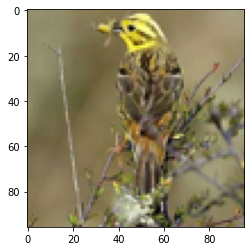

Streaming output truncated to the last 5000 lines.
train/6/1
train/2/2
train/7/3
train/4/4
train/10/5
train/8/6
train/5/7
train/6/8
train/9/9
train/1/10
train/7/11
train/1/12
train/9/13
train/8/14
train/7/15
train/5/16
train/7/17
train/3/18
train/3/19
train/2/20
train/2/21
train/7/22
train/3/23
train/2/24
train/9/25
train/6/26
train/2/27
train/6/28
train/6/29
train/1/30
train/1/31
train/1/32
train/2/33
train/4/34
train/7/35
train/8/36
train/3/37
train/2/38
train/4/39
train/2/40
train/7/41
train/2/42
train/4/43
train/8/44
train/5/45
train/4/46
train/1/47
train/7/48
train/8/49
train/7/50
train/6/51
train/9/52
train/1/53
train/7/54
train/2/55
train/4/56
train/7/57
train/9/58
train/3/59
train/3/60
train/10/61
train/10/62
train/6/63
train/2/64
train/8/65
train/9/66
train/8/67
train/9/68
train/9/69
train/10/70
train/1/71
train/6/72
train/1/73
train/3/74
train/6/75
train/6/76
train/8/77
train/9/78
train/10/79
train/6/80
train/1/81
train/9/82
train/4/83
train/3/84
train/10/85
train/7/86
train/

In [105]:
# path to the binary train file with image data
DATA_PATH = '/content/moco/stl10/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = '/content/moco/stl10/stl10_binary/train_y.bin'

# test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

labels = read_labels(LABEL_PATH)
print(labels.shape)

# save images to disk
save_images(images, labels, 'train')

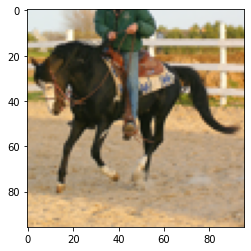

Streaming output truncated to the last 5000 lines.
val/5/3001
val/10/3002
val/5/3003
val/6/3004
val/1/3005
val/7/3006
val/3/3007
val/6/3008
val/9/3009
val/8/3010
val/7/3011
val/5/3012
val/2/3013
val/10/3014
val/9/3015
val/3/3016
val/5/3017
val/3/3018
val/10/3019
val/3/3020
val/8/3021
val/1/3022
val/4/3023
val/3/3024
val/1/3025
val/7/3026
val/6/3027
val/4/3028
val/8/3029
val/9/3030
val/5/3031
val/8/3032
val/2/3033
val/5/3034
val/2/3035
val/3/3036
val/8/3037
val/2/3038
val/4/3039
val/8/3040
val/3/3041
val/5/3042
val/5/3043
val/8/3044
val/8/3045
val/7/3046
val/1/3047
val/3/3048
val/4/3049
val/2/3050
val/1/3051
val/3/3052
val/2/3053
val/1/3054
val/7/3055
val/5/3056
val/1/3057
val/6/3058
val/1/3059
val/1/3060
val/2/3061
val/7/3062
val/9/3063
val/1/3064
val/9/3065
val/3/3066
val/3/3067
val/10/3068
val/5/3069
val/2/3070
val/5/3071
val/5/3072
val/6/3073
val/5/3074
val/3/3075
val/10/3076
val/2/3077
val/5/3078
val/2/3079
val/6/3080
val/6/3081
val/9/3082
val/1/3083
val/6/3084
val/3/3085
val/9/308

In [106]:
# path to the binary train file with image data
DATA_PATH = '/content/moco/stl10/stl10_binary/test_X.bin'

# path to the binary train file with labels
LABEL_PATH = '/content/moco/stl10/stl10_binary/test_y.bin'

# test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

labels = read_labels(LABEL_PATH)
print(labels.shape)

# save images to disk
save_images(images, labels, 'val')

In [108]:
cd /content/moco/

/content/moco


In [109]:
!python main_lincls.py \
    -a resnet50 \
    --lr 30 \
    --epochs 10 \
    --batch-size 64 \
    --gpu 0 \
    --pretrained moco_v1_200ep_pretrain.pth.tar \
    --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \
    'stl10/'

main_lincls.py:100: UserWarning: You have chosen a specific GPU. This will completely disable data parallelism.
  warnings.warn('You have chosen a specific GPU. This will completely '
Use GPU: 0 for training
=> creating model 'resnet50'
=> loading checkpoint 'moco_v1_200ep_pretrain.pth.tar'
=> loaded pre-trained model 'moco_v1_200ep_pretrain.pth.tar'
Epoch: [0][ 0/79]	Time 46.908 (46.908)	Data 42.597 (42.597)	Loss 6.9086e+00 (6.9086e+00)	Acc@1   0.00 (  0.00)	Acc@5   0.00 (  0.00)
Epoch: [0][10/79]	Time  0.387 ( 4.627)	Data  0.000 ( 3.873)	Loss 2.4195e+01 (1.0990e+01)	Acc@1  12.50 ( 15.48)	Acc@5  56.25 ( 53.27)
Epoch: [0][20/79]	Time  0.391 ( 2.609)	Data  0.000 ( 2.029)	Loss 4.7771e+00 (1.1110e+01)	Acc@1  54.69 ( 25.45)	Acc@5  92.19 ( 63.76)
Epoch: [0][30/79]	Time  0.393 ( 1.893)	Data  0.000 ( 1.374)	Loss 2.9506e+00 (8.6244e+00)	Acc@1  64.06 ( 36.24)	Acc@5  95.31 ( 73.49)
Epoch: [0][40/79]	Time  0.386 ( 1.526)	Data  0.000 ( 1.039)	Loss 2.3925e+00 (7.2372e+00)	Acc@1  71.88 ( 42.91)	Acc@